In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv ')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
'''
2. Find out all the feature names where Null values exist. 
'''
count_null = data.isnull().sum()
null_columns = count_null[count_null>0]
print(null_columns)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [6]:
'''
3. Fill the null values of the 'Age' column with the mean of the other values.  
And also fill the Null values of the 'Cabin' column with 'Unknown'. 
'''
age_mean = data["Age"].mean()
data['Age'].fillna(age_mean,inplace=True)
data["Cabin"].fillna("Unknown",inplace = True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3472\2131053021.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(age_mean,inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3472\2131053021.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

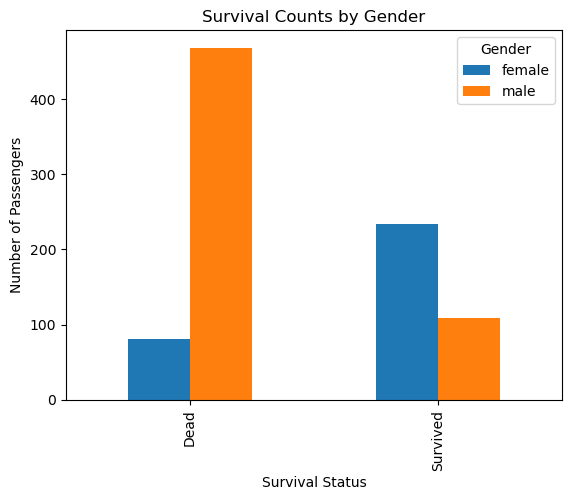

In [7]:
'''
4. Plot the dataset with 2 bars; Survived, Dead.  
And include Female and Male survivors' measurement in each bar. 
'''
survival_counts = data.groupby(['Survived', 'Sex']).size().unstack()
survival_counts = survival_counts.rename(index={0: 'Dead', 1: 'Survived'})

survival_counts.plot(kind='bar')
plt.title('Survival Counts by Gender')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.legend(title='Gender')
plt.show()

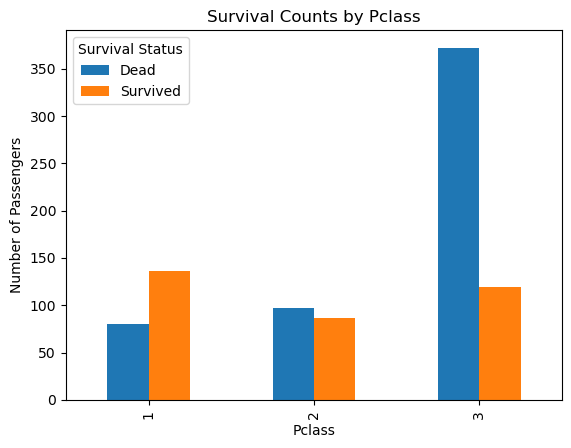

In [8]:
'''
5. Follow the step 4 and include the Survived, and Dead bars amongst the 'Pclass'. 
'''
survival_counts = data.groupby(['Pclass', 'Survived']).size().unstack()
survival_counts = survival_counts.rename(columns={0: 'Dead', 1: 'Survived'})
survival_counts.plot(kind='bar')

plt.title('Survival Counts by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend(title='Survival Status')
plt.show()

In [9]:
'''
6. Create a column named 'AgeClass' and insert values; 
* 0 if age <= 16 
* 1 if age <= 26 
* 2 if age <= 36 
* 3 if age <= 62 
* 4 otherwise 
'''
def categorize_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

data['AgeClass'] = data['Age'].apply(categorize_age)

print(data[['Age', 'AgeClass']].head())

    Age  AgeClass
0  22.0         1
1  38.0         3
2  26.0         1
3  35.0         2
4  35.0         2


In [39]:
age_counts = data.groupby('AgeClass').size()
age_counts

AgeClass
0    100
1    219
2    377
3    180
4     15
dtype: int64

In [11]:
'''
7. Now drop the column 'Age'. 
'''
data.drop('Age', axis=1,inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2


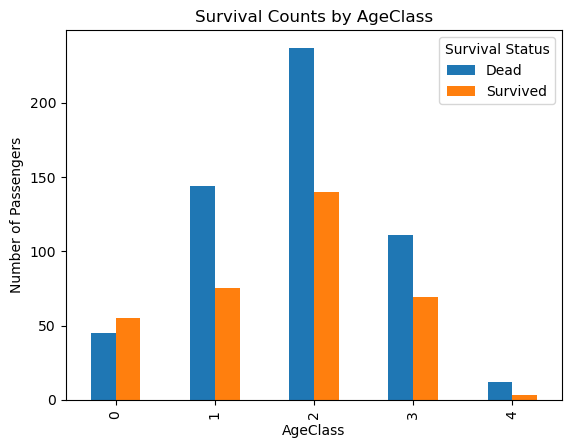

In [12]:
'''
8. Follow step 4 and create a bar plot of Survived and Dead using
the value counts amongst 'AgeClass' groups. 
'''
survival_counts = data.groupby(['AgeClass', 'Survived']).size().unstack()
survival_counts = survival_counts.rename(columns={0: 'Dead', 1: 'Survived'})

survival_counts.plot(kind='bar')

plt.title('Survival Counts by AgeClass')
plt.xlabel('AgeClass')
plt.ylabel('Number of Passengers')
plt.legend(title='Survival Status')
plt.show()

In [13]:
data.sample(100)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,0,0,PC 17477,69.3000,B35,C,1
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,0,0,347073,7.7500,Unknown,S,3
838,839,1,3,"Chip, Mr. Chang",male,0,0,1601,56.4958,Unknown,S,2
822,823,0,1,"Reuchlin, Jonkheer. John George",male,0,0,19972,0.0000,Unknown,S,3
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,0,0,374746,8.0500,Unknown,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
825,826,0,3,"Flynn, Mr. John",male,0,0,368323,6.9500,Unknown,Q,2
536,537,0,1,"Butt, Major. Archibald Willingham",male,0,0,113050,26.5500,B38,S,3
529,530,0,2,"Hocking, Mr. Richard George",male,2,1,29104,11.5000,Unknown,S,1
597,598,0,3,"Johnson, Mr. Alfred",male,0,0,LINE,0.0000,Unknown,S,3
